<a href="https://colab.research.google.com/github/Stratoslow/CODERHOUSE/blob/main/OBTENCION_INSIGHTS_A_PARTIR_DE_LAS_VISUALIZACIONES%2BLAURENS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Comenzamos la notebook con la incorporacion de una API que nos permite buscar y traer de Kaggle, el dataset que querramos utilizar para la entrega:


In [1]:
! pip install -q kaggle

Luego de realizar la instalacion lo que tenemos que hacer es subir el archivo que tiene El JSON con el usuario y la KEY que nos permite usar la API, para esto ejecutamos el comando para importar files

In [2]:
from google.colab import files

Usamos el comando Files Upload para importar el JSON, previamente creado directamente en la pagina que descargue en mi computardora con el TOKEN para poder conectarme a la API

In [3]:
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"stratoslow","key":"b13d047fb0a9097e73823be73f06c99d"}'}

Creamos un directorio que se llame Kaggle, le damos permisos de administrador y copiamos el JSON al directorio (todo esto tambien nos sirve para practicar como copiar y movernos dentro e los directorios que vamos a utilizar)

In [4]:
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

Siguiendo el instructivo de como utilizar la api de Kaggle, ejecuto el primer comando para ver el listado de DATASETs

In [5]:
! kaggle datasets list

ref                                                              title                                             size  lastUpdated          downloadCount  voteCount  usabilityRating  
---------------------------------------------------------------  -----------------------------------------------  -----  -------------------  -------------  ---------  ---------------  
rahulvyasm/netflix-movies-and-tv-shows                           Netflix Movies and TV Shows                        1MB  2024-04-10 09:48:38          10092        211  1.0              
rabieelkharoua/predict-survival-of-patients-with-heart-failure   Predict survival of patients with heart failure    4KB  2024-04-25 10:21:47           1418         31  1.0              
paramvir705/airbnb-data                                          AirBNB_Data                                       31MB  2024-04-20 06:52:12           1094         30  1.0              
jaceprater/smokers-health-data                                   Smoke

Aca vemos un listado de todos los datasets que contiene Kaggle, para ser mas especificos buscamos en la documentacion y encontramos un comando de la API que nos permite filtrar el Dataset que elegimos (crimenes LA)

In [6]:
! kaggle datasets list -s crimes

ref                                                     title                                        size  lastUpdated          downloadCount  voteCount  usabilityRating  
------------------------------------------------------  ------------------------------------------  -----  -------------------  -------------  ---------  ---------------  
AnalyzeBoston/crimes-in-boston                          Crimes in Boston                             10MB  2018-09-04 17:56:03          46843        703  0.8235294        
currie32/crimes-in-chicago                              Crimes in Chicago                           467MB  2017-01-28 03:17:31          35285        321  0.7352941        
ankkur13/boston-crime-data                              Crimes in Boston                             11MB  2018-10-04 13:52:08          10660        197  0.8235294        
nehaprabhavalkar/crime-in-india                         Crimes in India                              12KB  2020-09-23 07:23:02           349

Encontramos el Dataset! Ahora es el momento de descargarlo.... volvemos a la documentacion y encontramos un nuevo comando de la api que nos permite realizar dicha funcion!!

In [7]:
! kaggle datasets download -d  ishmaelkiptoo/usa-los-angeles-crimes-data-2020-to-2023

Dataset URL: https://www.kaggle.com/datasets/ishmaelkiptoo/usa-los-angeles-crimes-data-2020-to-2023
License(s): CC0-1.0
 86% 35.0M/40.8M [00:00<00:00, 124MB/s]
100% 40.8M/40.8M [00:00<00:00, 124MB/s]


Ahora nos encontramos con el archivo, pero se encuentra comprimido en formato ZIP, siguiendo algunos instructivos damos con el comando dentro de COLAB que nos permite descomprimir el archivo....

In [8]:
!unzip /content/usa-los-angeles-crimes-data-2020-to-2023.zip

Archive:  /content/usa-los-angeles-crimes-data-2020-to-2023.zip
  inflating: Crime_Data_from_2020_to_Present.csv  


De esta manera ya queda descomprimido y listo para ser utilizado! Vamos a importar la libreria pandas para comenzar!

In [9]:
import pandas as pd

Le asignamos el nombre dataframe y hacemos la lectura de nuestra base de datos elegida!!!

In [10]:
%cd '/content/'
df= pd.read_csv('Crime_Data_from_2020_to_Present.csv',sep=',')

/content


Luego de esto, empezamos a ver la forma que tiene nuestra base(shape) y los headers como para comenzar a enteder lo que estamos buscando y comenzar a trabajar. Para esto, utilizamos dos comandos:

In [11]:
df.shape

(829778, 28)

In [12]:
df.head()

,DR_NO,Date Rptd,DATE OCC,TIME OCC,AREA,AREA NAME,Rpt Dist No,Part 1-2,Crm Cd,Crm Cd Desc,...,Status,Status Desc,Crm Cd 1,Crm Cd 2,Crm Cd 3,Crm Cd 4,LOCATION,Cross Street,LAT,LON
0,10304468,01/08/2020 12:00:00 AM,01/08/2020 12:00:00 AM,2230,3,Southwest,377,2,624,BATTERY - SIMPLE ASSAULT,...,AO,Adult Other,624.0,NaN,NaN,NaN,1100 W 39TH PL,NaN,34.0141,-118.2978
1,190101086,01/02/2020 12:00:00 AM,01/01/2020 12:00:00 AM,330,1,Central,163,2,624,BATTERY - SIMPLE ASSAULT,...,IC,Invest Cont,624.0,NaN,NaN,NaN,700 S HILL ST,NaN,34.0459,-118.2545
2,200110444,04/14/2020 12:00:00 AM,02/13/2020 12:00:00 AM,1200,1,Central,155,2,845,SEX OFFENDER REGISTRANT OUT OF COMPLIANCE,...,AA,Adult Arrest,845.0,NaN,NaN,NaN,200 E 6TH ST,NaN,34.0448,-118.2474
3,191501505,01/01/2020 12:00:00 AM,01/01/2020 12:00:00 AM,1730,15,N Hollywood,1543,2,745,VANDALISM - MISDEAMEANOR ($399 OR UNDER),...,IC,Invest Cont,745.0,998.0,NaN,NaN,5400 CORTEEN PL,NaN,34.1685,-118.4019
4,191921269,01/01/2020 12:00:00 AM,01/01/2020 12:00:00 AM,415,19,Mission,1998,2,740,"VANDALISM - FELONY ($400 & OVER, ALL CHURCH VA...",...,IC,Invest Cont,740.0,NaN,NaN,NaN,14400 TITUS ST,NaN,34.2198,-118.4468


Se adjunta el link a la presentacion de los INSIGHTS https://www.canva.com/design/DAGDEv_cgRY/XU6kzvHxbtsmF_dHEJofFQ/edit?utm_content=DAGDEv_cgRY&utm_campaign=designshare&utm_medium=link2&utm_source=sharebutton

**A partir de aqui, nos planteamos las primeras hipotesis....**

Hipótesis: Dado que el conjunto de datos proporciona información detallada sobre crímenes, fechas y ubicaciones, podríamos hipotetizar que existe una relación entre ciertos tipos de crímenes y áreas específicas. Podríamos también explorar patrones temporales, como la frecuencia de ciertos crímenes en días particulares. Además, podríamos investigar si hay correlaciones entre la hora del día y el tipo de crimen. Esto podría ser útil para las fuerzas del orden y las autoridades para tomar medidas preventivas y mejorar la seguridad en áreas específicas.

**PREGUNTAS DE INTERES.....**



*   CUAL ES EL CRIMEN MAS FRECUENTE EN LA?
*   CUANTOS CRIMENES POR SEMANA OCURREN EN LA?

*   CUAL ES EL HORARIO EN EL QUE SE PRODUCEN LA MAYOR Y LA MENOR CANTIDAD DE CRIMENES EN LA?
*   CUANTO TARDAN LAS PERSONAS EN REPORTAR UN CRIMEN?


*   DONDE SE LOCALIZAN LA MAYOR CANTIDAD DE CRIMENES EN LA ?
*   CUAL ES EL LUGAR MAS COMUN DONDE OCURRE EL CRIMEN ?


*   CUAL FUE EL AÑO CON MAS CRIMENES ?
*   CUALES FUERON LAS EDADES DE LAS VICTIMAS MAS AFECTADAS?


*   CUAL FUE LA ETNIA CON MAS AFECTACION DE CRIMENES ?
*   LOS CASOS SE RESUELVEN O QUEDAN INCONCLUSOS? PODEMOS PREDECIR SI UN CASO SE PUEDE RESOLVER?











Lo proximo a realizar con el dataframe, es comenzar a entender el tipo de dato que contiene cada columna, para esto tenemos la funcion info para comenzar nuestro analisis exploratorio:

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 829778 entries, 0 to 829777
Data columns (total 28 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   DR_NO           829778 non-null  int64  
 1   Date Rptd       829778 non-null  object 
 2   DATE OCC        829778 non-null  object 
 3   TIME OCC        829778 non-null  int64  
 4   AREA            829778 non-null  int64  
 5   AREA NAME       829778 non-null  object 
 6   Rpt Dist No     829778 non-null  int64  
 7   Part 1-2        829778 non-null  int64  
 8   Crm Cd          829778 non-null  int64  
 9   Crm Cd Desc     829778 non-null  object 
 10  Mocodes         714922 non-null  object 
 11  Vict Age        829778 non-null  int64  
 12  Vict Sex        720479 non-null  object 
 13  Vict Descent    720471 non-null  object 
 14  Premis Cd       829768 non-null  float64
 15  Premis Desc     829286 non-null  object 
 16  Weapon Used Cd  289319 non-null  float64
 17  Weapon Des

Los datos contienen más de 600.000 incidentes delictivos, con 28 atributos. Si bien los clasificaron en muchas columnas como int o float,  solo la edad de la víctima (Vict Age) es verdaderamente numérica. La mayoría de los demás son códigos (que contienen Cd en los nombres de sus columnas) y, en su lugar, deben tratarse como cadenas (STRING).

Ahora entonces comienza la limpieza de la base, asignando un campo para los datos nulos, verificacion de duplicados y el caso de los datos desconocidos, los "rellenamos" para que queden como "desconocidos"

In [14]:
SIN_DATOS = df.isnull().sum()
COLUMNAS_DUPLICADAS=df.duplicated().sum()
TIPO_DATOS=df.dtypes


Mostramos los campos creados para ver como estan:

In [15]:
SIN_DATOS, COLUMNAS_DUPLICADAS, TIPO_DATOS

(DR_NO                  0
 Date Rptd              0
 DATE OCC               0
 TIME OCC               0
 AREA                   0
 AREA NAME              0
 Rpt Dist No            0
 Part 1-2               0
 Crm Cd                 0
 Crm Cd Desc            0
 Mocodes           114856
 Vict Age               0
 Vict Sex          109299
 Vict Descent      109307
 Premis Cd             10
 Premis Desc          492
 Weapon Used Cd    540459
 Weapon Desc       540459
 Status                 0
 Status Desc            0
 Crm Cd 1              10
 Crm Cd 2          768750
 Crm Cd 3          827720
 Crm Cd 4          829717
 LOCATION               0
 Cross Street      697270
 LAT                    0
 LON                    0
 dtype: int64,
 0,
 DR_NO               int64
 Date Rptd          object
 DATE OCC           object
 TIME OCC            int64
 AREA                int64
 AREA NAME          object
 Rpt Dist No         int64
 Part 1-2            int64
 Crm Cd              int64
 Crm Cd De

**Rellenamos los datos que estan vacios:**

In [16]:
df.fillna("desconocido",inplace=True)

Con la primer limpieza realizada, ya podemos comenzar a realizar los primeros calculos sobre los campos de la base de datos elegida, una de las preguntas que nos surge, es sobre la frecuencia de los crimenes, para esto utilizamos el siguiente codigo:

In [17]:
crime_freq = df["Crm Cd Desc"].value_counts()

Vemos que hay dentro de CRIME_FREQ:

In [18]:
crime_freq

Crm Cd Desc
VEHICLE - STOLEN                                           88892
BATTERY - SIMPLE ASSAULT                                   66149
THEFT OF IDENTITY                                          52321
BURGLARY FROM VEHICLE                                      50941
VANDALISM - FELONY ($400 & OVER, ALL CHURCH VANDALISMS)    50556
                                                           ...  
GRAND THEFT / AUTO REPAIR                                      5
FIREARMS RESTRAINING ORDER (FIREARMS RO)                       4
FAILURE TO DISPERSE                                            3
DISHONEST EMPLOYEE ATTEMPTED THEFT                             2
INCITING A RIOT                                                1
Name: count, Length: 138, dtype: int64

De esta manera, tenemos un nuevo campo con la frecuencia de los crimenes que ya nos permite contestar una pregunta.... **CUAL ES EL CRIMEN MAS FRECUENTE EN LA?**

Usamos los conocimientos adquiridos en la clase 29 para poder realizar una transformacion en los campos DATE que tenemos, para que sean datetime y calcular la duracion de los crimenes (los queremos pasar a dias para obtener la frecuencia diria de crimenes) pero primero tenemos que importar las librerias correspondientes, por ejemplo si no lo hicieramos nos daria error de dateutil que es lo que vamos a usar para poder realizar la transformacion

In [19]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

AGREGAMOS EL **ANALISIS BIVARIADOS** PARA ESTA NUEVA ENTREGA:

Utilicé matplotlib de Python para crear el diagrama de caja. Este gráfico muestra qué horas fueron más populares para cometer delitos según los grupos de edad. Los hallazgos de este diagrama de caja me sorprendieron un poco porque supuse que la mayoría de los delitos ocurrirían a altas horas de la noche, cuando en realidad ocurrieron principalmente entre las 9 am y las 7 pm. El código para este gráfico tiene los ejes x e y configurados con sus variables, siendo la variable "Vict_Age_Group" una variable que se configuró para agruparse con rangos de edad y etiquetas de edad. Este código creó un diagrama de caja con un diagrama individual para cada grupo de edad. Hay un caso atípico en este gráfico en la parte inferior del grupo de edad < 18. Esto podría deberse a que hubo delitos cometidos contra niños muy pequeños, mientras que la mayoría de las víctimas en este grupo de edad eran adolescentes mayores.

In [20]:
age_ranges = [0, 17, 25, 34, 44, 54, 64, float('inf')]
age_labels = ['<18', '18-25', '26-34', '35-44', '45-54', '55-64', '65+']
df['Vict_agrup_años'] = pd.cut(df['Vict Age'], bins=age_ranges, labels=age_labels)

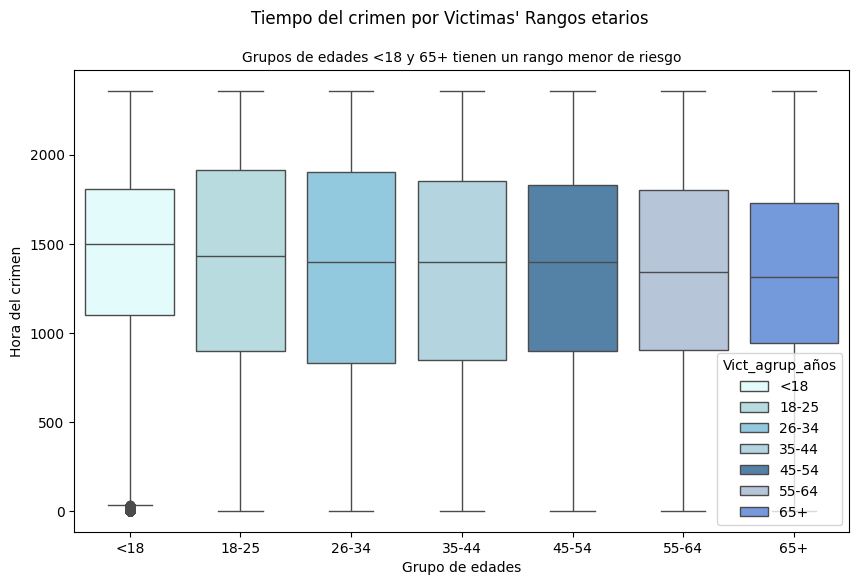

In [21]:
# Crear un diccionario de paleta de colores personalizada
custom_palette = {'<18': 'lightcyan', '18-25': 'powderblue', '26-34': 'skyblue', '35-44': 'lightblue',
                  '45-54': 'steelblue', '55-64': 'lightsteelblue', '65+': 'cornflowerblue'}

# Crear el boxplot con hue='Vict_Age_Group'
fig, ax = plt.subplots(figsize=(10, 6))
sns.boxplot(x='Vict_agrup_años', y='TIME OCC', data=df, palette=custom_palette, hue='Vict_agrup_años')

# Etiquetas y título
plt.xlabel("Grupo de edades")
plt.ylabel("Hora del crimen")
plt.title("Grupos de edades <18 y 65+ tienen un rango menor de riesgo", fontsize=10)
plt.suptitle("Tiempo del crimen por Victimas' Rangos etarios")

# Mostrar el gráfico
plt.show()

Despues de importar... Transformamos la data!

In [25]:
df['Date Rptd'] = pd.to_datetime(df['Date Rptd'], format='%Y-%m-%d')
df['DATE OCC'] = pd.to_datetime(df['DATE OCC'], format='%Y-%m-%d')

Ahora si.... **Calculemos la duracion!**

In [26]:
# Duracion
duration = (df["DATE OCC"].max() - df["DATE OCC"].min()).days

Y con esto podemos contestar la pregunta con nuestro primer grafico usando seaborn:
**cabe aclarar que para realizar el siguiente grafico iteramos varias veces y utilizamos herramientas como chat GPT para solucionar problemas que se presentaron para que cada barra sea de un color distinto, dando como resultado la utilizacion de "palette" y de la cantidad de barras para lograrlo**

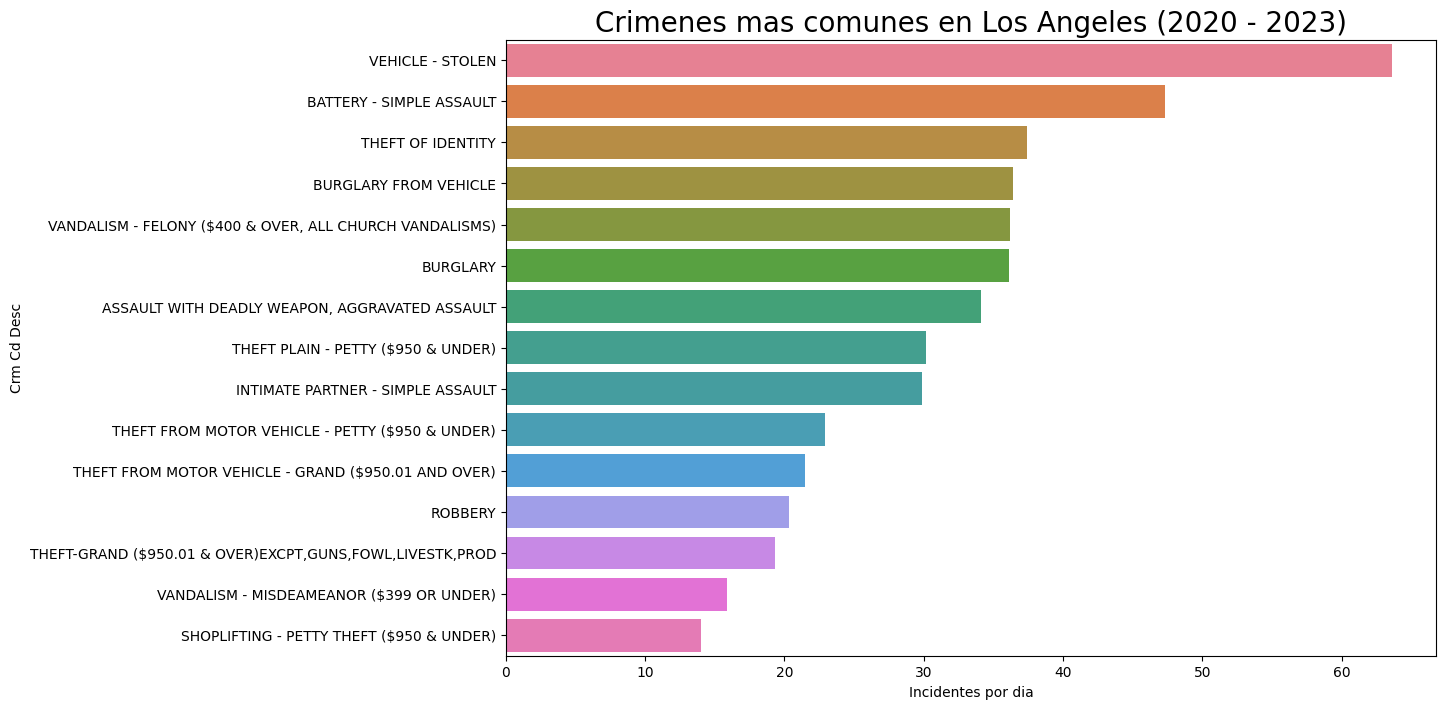

In [24]:
plt.rcParams["figure.figsize"] = (12, 8) # Escala por defecto
plt.rcParams['axes.titlesize'] = 20

sns.barplot(x=crime_freq.values[:15]/duration, y=crime_freq.index[:15], hue=crime_freq.index[:15], palette="husl", legend=False)
plt.title("Crimenes mas comunes en Los Angeles (2020 - 2023)")
plt.xlabel("Incidentes por dia")
plt.show()

CUAL ES EL CRIMEN MAS FRECUENTE EN LA? **ROBO DE VEHICULOS**





**Una nueva pregunta para esta entrega**

*   Cual es el arma mas utilizada en los crimenes?




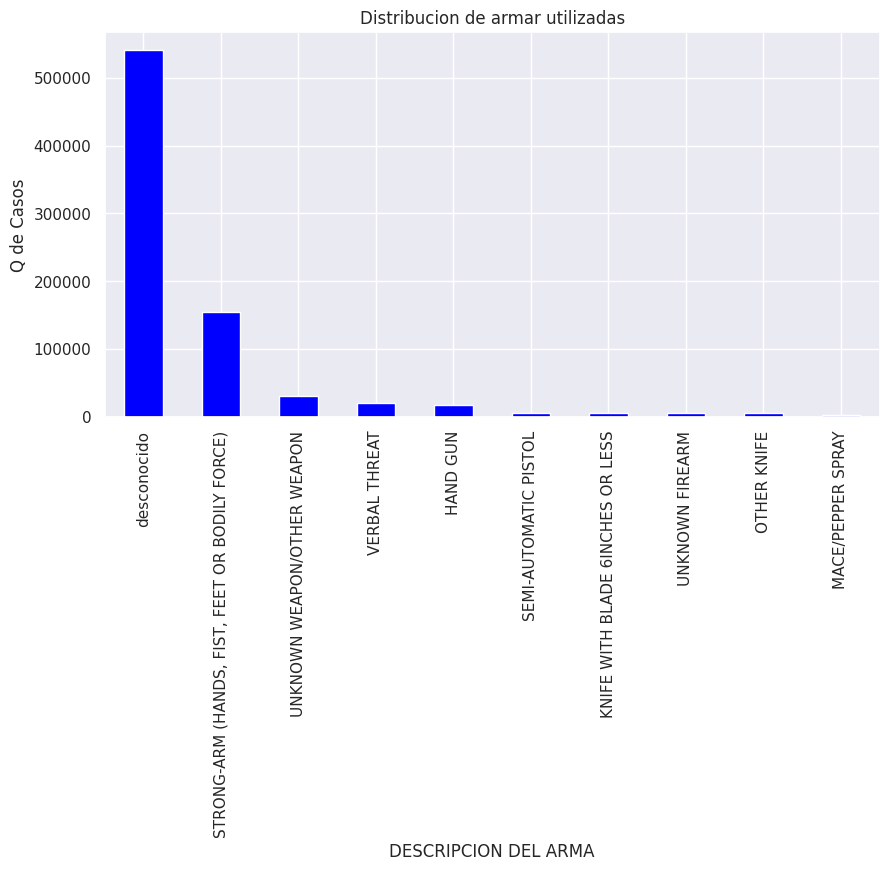

In [50]:
# Cuenta de armas utilizadas
contar_armas = df['Weapon Desc'].value_counts()[:10]

# Visualize the distribution of weapon types
plt.figure(figsize=(10, 5))
contar_armas.plot(kind='bar', color='blue')
plt.xlabel('DESCRIPCION DEL ARMA')
plt.ylabel('Q de Casos')
plt.title('Distribucion de armar utilizadas')
plt.xticks(rotation=90)
plt.show()

CUAL ES EL ARMA MAS UTILIZADA? **LA PROPIA FUERZA DE BRAZOS O PUÑETAZOS**

Seguimos con el calculo para ver el **porcentaje** de crimenes sobre el total:

In [42]:
crime_freq_df = crime_freq.to_frame().reset_index()
crime_freq_df.columns = ["Crm", "Count"]
crime_freq_df['Perc'] = crime_freq_df.Count/crime_freq_df.Count.sum()*100
crime_freq_df['CumPerc'] = crime_freq_df["Perc"].cumsum()

Vemos cuales son mayores o mas frecuentes:

In [43]:
crime_freq_df[crime_freq_df.CumPerc < 70]

,Crm,Count,Perc,CumPerc
0,VEHICLE - STOLEN,88892,10.712745,10.712745
1,BATTERY - SIMPLE ASSAULT,66149,7.971891,18.684636
2,THEFT OF IDENTITY,52321,6.305421,24.990058
3,BURGLARY FROM VEHICLE,50941,6.139112,31.129169
4,"VANDALISM - FELONY ($400 & OVER, ALL CHURCH VA...",50556,6.092714,37.221883
5,BURGLARY,50535,6.090183,43.312067
6,"ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT",47711,5.749851,49.061918
7,THEFT PLAIN - PETTY ($950 & UNDER),42158,5.080636,54.142554
8,INTIMATE PARTNER - SIMPLE ASSAULT,41776,5.034600,59.177153
9,THEFT FROM MOTOR VEHICLE - PETTY ($950 & UNDER),32026,3.859587,63.036740


Hacemos ahora un calculo para conocer los crimenes por semana:



In [44]:
# Crimenes SEMANALES
df['SEMANAL'] = pd.DatetimeIndex(df["DATE OCC"]).to_period('W').to_timestamp()
# Crimenes MENSUALES
df['MENSUAL'] = pd.DatetimeIndex(df["DATE OCC"]).to_period('M').to_timestamp()

Volvemos a usar los conocimientos de la clase numero 29 para realizar un **GROUP BY** por semana y armamos un grafico donde se muestre la frecuencia semanal. Esto nos contestaria la pregunta de **CUANTOS CRIMENES POR SEMANA OCURREN EN LA?**

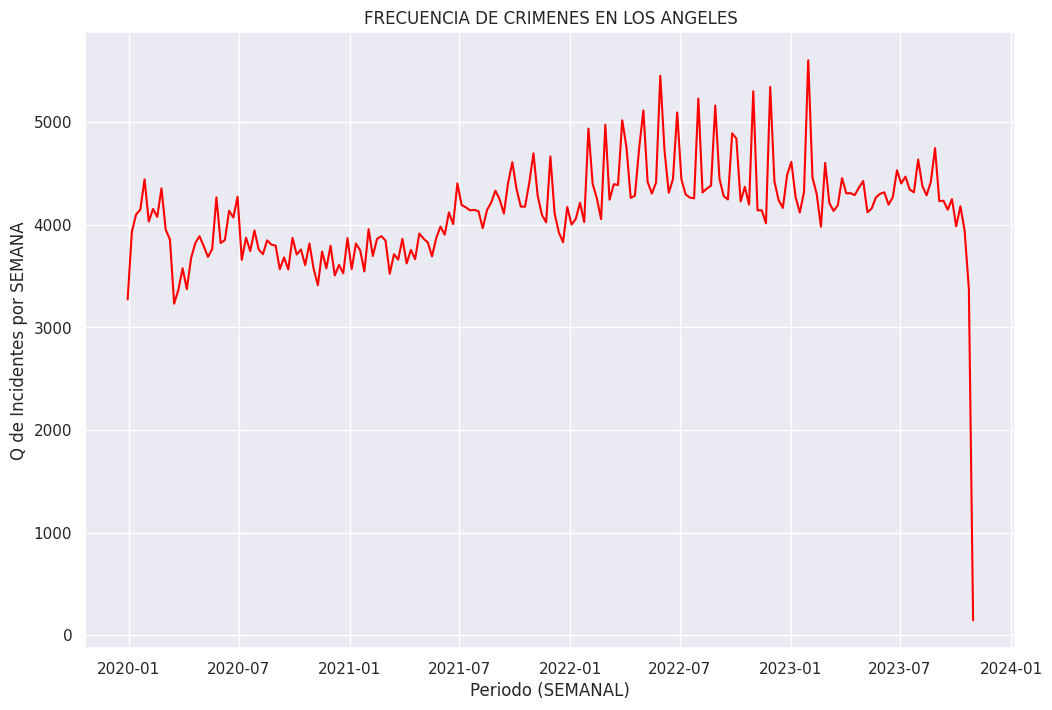

In [45]:
crime_time = df.groupby("SEMANAL").count().reset_index()[["SEMANAL", "DR_NO"]]

plt.figure(figsize=(12,8))
sns.lineplot(x=crime_time.SEMANAL, y=crime_time.DR_NO, color='red')
plt.title("FRECUENCIA DE CRIMENES EN LOS ANGELES")
plt.ylabel("Q de Incidentes por SEMANA")
plt.xlabel("Periodo (SEMANAL)");

La caída en la última semana de 2023 probablemente se deba a datos no actualizados,es decir, la semana del 27 de febrero de 2023, pero estos datos se actualizaron por última vez el 1 de marzo de 2023. En comparación con principios de 2020, parece que se producirán un poco más de delitos a finales de 2022.

Con el dato del comportamiento de los crimenes por semana, podemos separar en los tipos de crimenes y hacer un TOP TEN y poder ver graficamente cuales son los crimenes mas comunes en LA por semana. Para esto realizamos lo siguiente:

In [46]:
# TOP 10 CRIMENES SEMANALES
top_crime = crime_freq_df.iloc[:10,0]
top_crime_time = df[df['Crm Cd Desc'].isin(top_crime)]

Ya tenemos el top de crimenes.... veamoslo:

In [47]:
top_crime

0                                     VEHICLE - STOLEN
1                             BATTERY - SIMPLE ASSAULT
2                                    THEFT OF IDENTITY
3                                BURGLARY FROM VEHICLE
4    VANDALISM - FELONY ($400 & OVER, ALL CHURCH VA...
5                                             BURGLARY
6       ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT
7                   THEFT PLAIN - PETTY ($950 & UNDER)
8                    INTIMATE PARTNER - SIMPLE ASSAULT
9      THEFT FROM MOTOR VEHICLE - PETTY ($950 & UNDER)
Name: Crm, dtype: object

Agrupemos por semana y mostremos como se ven estos cremienes a lo largo del tiempo:

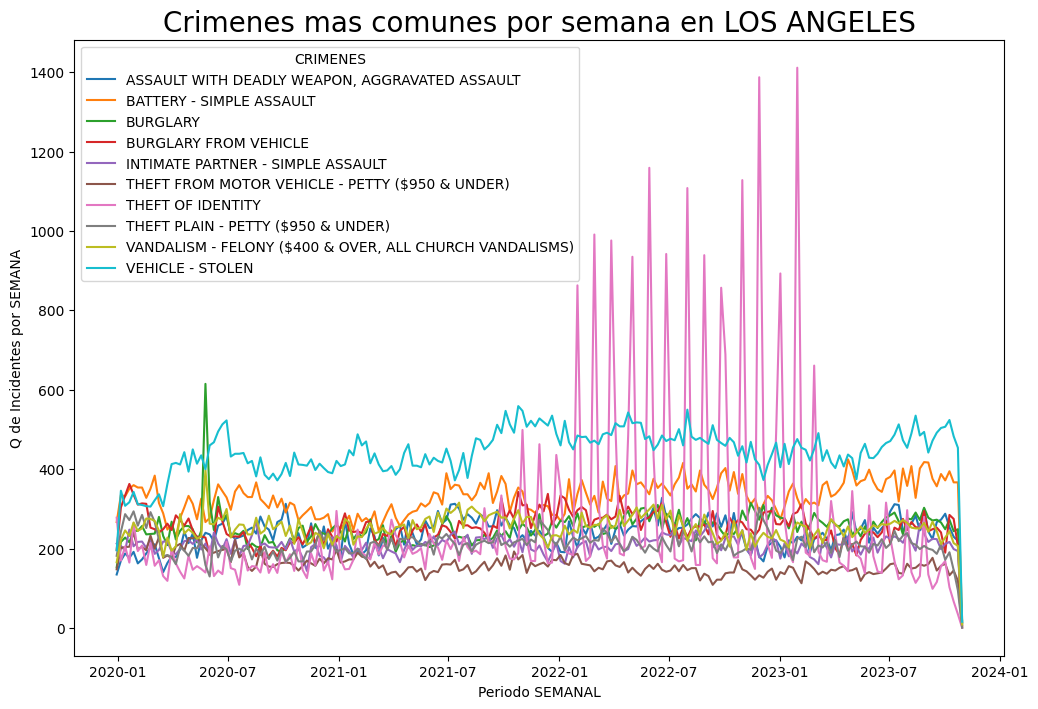

In [33]:
top_crime_time_week = top_crime_time.groupby(["SEMANAL", "Crm Cd Desc"]).count().reset_index()[["SEMANAL", "Crm Cd Desc", "DR_NO"]]

plt.figure(figsize=(12,8))
sns.lineplot(data=top_crime_time_week, x="SEMANAL", y = "DR_NO", hue = 'Crm Cd Desc')
plt.title("Crimenes mas comunes por semana en LOS ANGELES")
plt.ylabel("Q de Incidentes por SEMANA")
plt.xlabel("Periodo SEMANAL")
plt.legend(title = "CRIMENES");

Hay Varios "picos" en lo que refiere al **ROBO DE INDENTIDAD** que se da desde enero del 2022 lo que me lleva a pensar en agrupar por MES para ver el comportamiento:

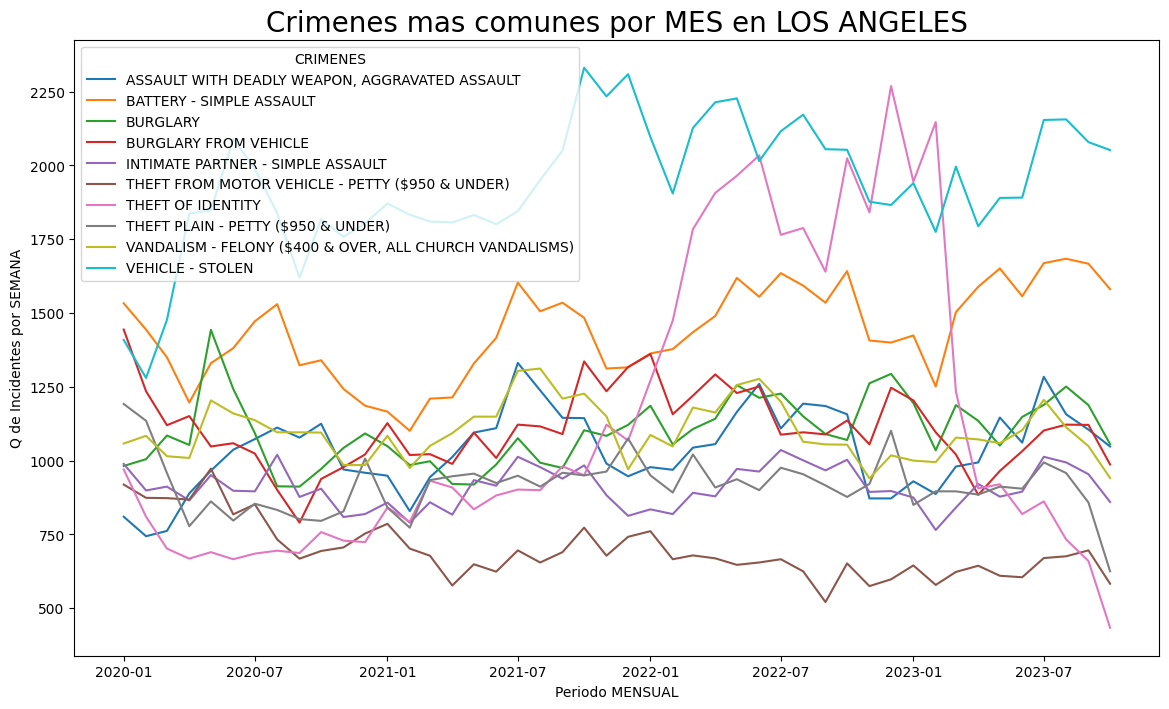

In [ ]:
top_crime_time_month = top_crime_time.groupby(["MENSUAL", "Crm Cd Desc"]).count().reset_index()[["MENSUAL", "Crm Cd Desc", "DR_NO"]]

plt.figure(figsize=(14,8))
sns.lineplot(data=top_crime_time_month, x="MENSUAL", y = "DR_NO", hue = 'Crm Cd Desc')
plt.title("Crimenes mas comunes por MES en LOS ANGELES")
plt.ylabel("Q de Incidentes por SEMANA")
plt.xlabel("Periodo MENSUAL")
plt.legend(title = "CRIMENES");

Ahora si vemos y confirmamos que el **ROBO DE VEHICULOS** es el preponderante, pero durante el perido de 2023 el **ROBO DE IDENTIDAD** tuvo mayor protagonismo

Pasamos entonces a nuestra proxima pregunta, **CUAL ES EL HORARIO EN EL QUE SE PRODUCEN LA MAYOR Y LA MENOR CANTIDAD DE CRIMENES EN LA?**

Para esto primero tenemos que generar un slot de tiempo y generar las etiquetas donde vamos a agrupar cada 2 horas el horario completo de un dia:

In [ ]:
df['TimeSlot'] = pd.cut(x=df["TIME OCC"],
    bins=[0, 159, 359, 559, 759, 959, 1159, 1359, 1559, 1759, 1959, 2159, 2359],
    labels=['0-2','2-4','4-6','6-8','8-10','10-12','12-14', '14-16', '16-18','18-20','20-22','22-24'])

Nuevamente con las abilidades adquiidas agrupamos y elegimos entre varios graficos, donde nos quedamos para lograr un mayor impacto, el mapa de calor que nos muestra claramente la respuesta a nuestra pregunta:

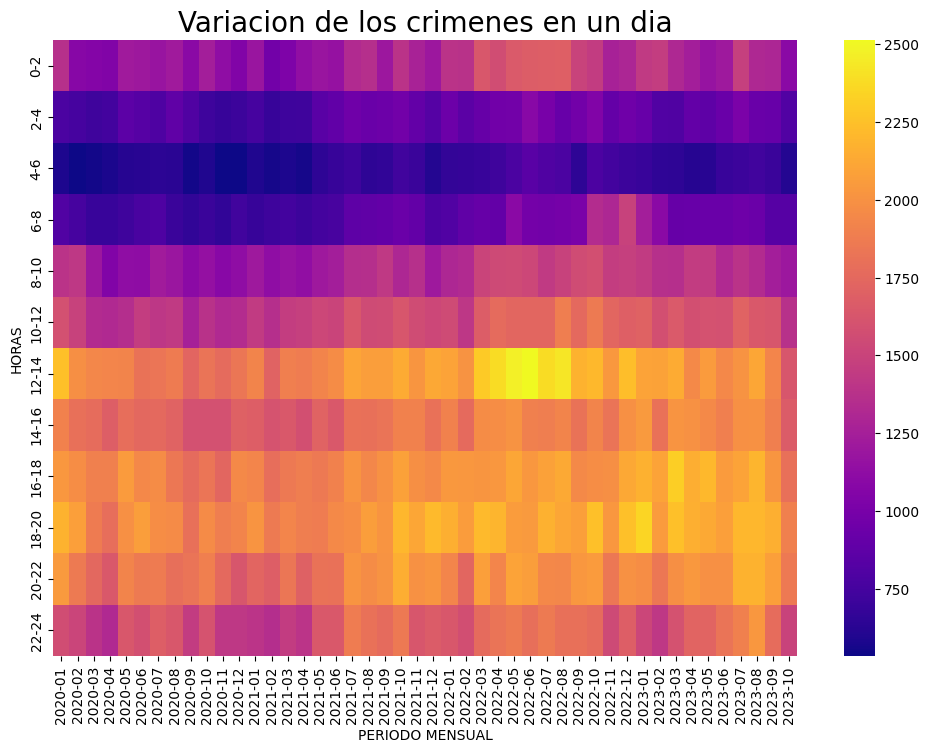

In [ ]:
crime_hour = df.groupby(['TimeSlot', 'MENSUAL'])['DR_NO'].size().reset_index()
crime_hour_table = crime_hour.pivot_table(index="TimeSlot", columns='MENSUAL', values='DR_NO', aggfunc='sum')
sns.heatmap(crime_hour_table, cmap="plasma")
plt.title("Variacion de los crimenes en un dia")
plt.xticks(np.arange(0.5, 46, 1), labels=crime_hour_table.columns.to_period('M'))
plt.xlabel("PERIODO MENSUAL")
plt.ylabel("HORAS")
plt.show()


Concluimos entonces: **Es menos probable que los delitos ocurran entre las 4 y las 6 a.m. de la mañana, y es más probable que ocurran entre las 12 y las 14 p.m. y las 18 a 20 p.m.**

Continuamos entonces con otra de las preguntas que nos realizamos en la Hipotesis que decia: **Cuanto tardan las personas en reportar un crimen?**
Esto supone un desafio porque tenemos que calcular la demora, enteder los dias, meses o hasta a veces años que se tarda en reportar un delito

In [ ]:
df['demora'] = (df['Date Rptd'] - df['DATE OCC']).dt.days

In [ ]:
df['delay_cat'] = pd.cut(
    x=df["demora"],
    bins=[-1, 0, 1, 2, 7, 30, 365, np.inf],
    labels=["mismo dia","1 dia","2 dias",'3-7 dias','8-30 dadiasys','1 mes-1 año','Mas de un año'])

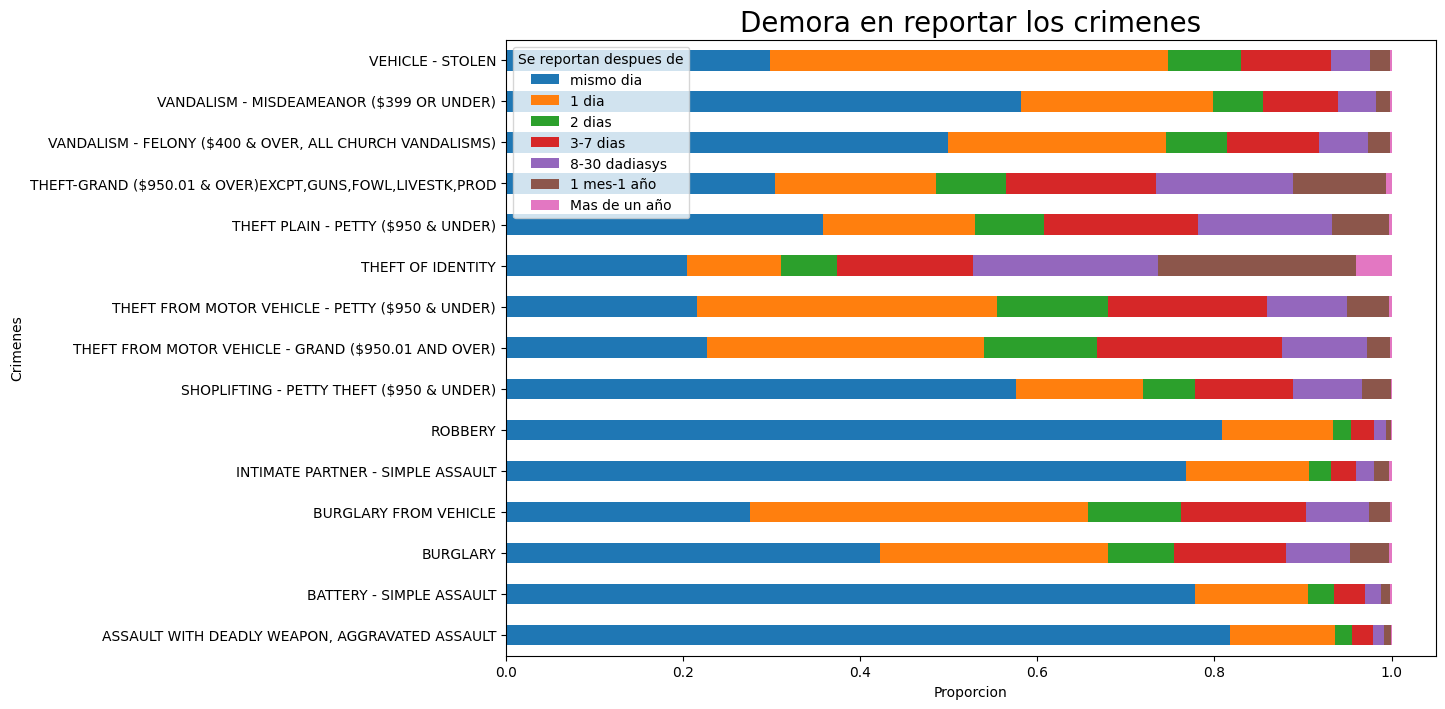

In [ ]:
top_crime = crime_freq_df.iloc[:15,0]
top_crime_delay = df[df['Crm Cd Desc'].isin(top_crime)].groupby("Crm Cd Desc")['delay_cat'].value_counts(normalize=True).unstack()

top_crime_delay.plot.barh(stacked = True)
plt.title('Demora en reportar los crimenes')
plt.ylabel('Crimenes')
plt.xlabel('Proporcion')
plt.legend(title = "Se reportan despues de");

Podemos concluir de este grafico que: **La mayoría de los delitos comunes se denuncian dentro del día o al día siguiente al incidente. Se reportan muchos asaltos, vandalismo, robo y robo de vehículos. Sin embargo, los robos y hurtos generalmente se denuncian más tarde, lo que puede reflejar la naturaleza de esos delitos y que las víctimas tal vez no se den cuenta de ellos de inmediato. En particular, el robo de identidad, el delito cada vez más popular, también es el que sufre el mayor retraso en su denuncia.**

Continuamos con la siguiente pregunta que es la siguiente:
**Donde se producen la mayor cantidad de crimenes en LA ?**

In [ ]:
import folium
from folium.plugins import HeatMap

Hacemos un IMPORT de FOLIUM, buscamos documentacion en la WEB y vemos que es un repositorio super completo que nos permite posicionarnos con la LAT y LONG en el mapa que necesitemos y armar el mapa de calor

Para esto tuvimos que excluir los campos de lat y long sin datos y tomar un minimos de % de los crimenes por zona:

In [ ]:
# Se excluyen los lugares sin lat y long
valid_lat_lon = df[(df['LAT'] != 0) & (df['LON'] != 0)]
# se toman como muestra el 0.1 % de todos los crimenes
sample_df = valid_lat_lon.sample(int(0.001 * len(valid_lat_lon)))
lat_lon_pairs = list(zip(list(sample_df.LAT), list(sample_df.LON)))

In [ ]:
map_la = folium.Map(location = [34.0522, -118.2437], zoom_start = 10)
HeatMap(lat_lon_pairs).add_to(map_la)
map_la

Si bien el mapa nos permitio ver a simple vista donde se producen la mayor cantidad de crimenes, esto no responde del todo la pregunta. Con lo cual decidimos seguir buscando para importar una libreria que nos permita saber el Q por zona, encontramos **ploty express**

In [ ]:
import plotly.express as px

Siguiendo documentacion online damos con el siguiente codigo (tambien tuvimos que iterar con CHATGPT):

In [ ]:
valid_lat_lon.loc[:, 'area_count'] = valid_lat_lon.groupby('AREA')['DR_NO'].transform('count')
fig = px.scatter(data_frame = valid_lat_lon.sample(int(0.01 * len(valid_lat_lon))),
                 x='LON', y='LAT', color_continuous_scale = "viridis",
                 color = "area_count", hover_data = ["AREA NAME"],
                 labels={"LAT":"Latitud", "LON":"Longitud", "area_count":"Incidentes"},
                 title = "Numero de incidentes por AREA")
fig.update_layout(width = 600, height = 700, title={'x': 0.5, 'xanchor': 'center'})
fig.update_yaxes(scaleanchor="x", scaleratio=1,)
fig.update_traces(marker=dict(size=6,
                              line=dict(width=0.5,
                                        color='aliceblue')),
                  selector=dict(mode='markers'))
fig.show()

De esta manera concluimos que el **AREA NAME: CENTRAL** es la que tiene **mayor numero de crimenes**

> Añadir blockquote



Moviendonos a la siguiente pregunta, vemos que tenemos la posibilidad de ver de manera rapida, en que locacion/sitio tuvo lugar el crimen. Vemos que hay un campo que se llama Premis Desc que contiene esa informacion en formato String, con lo cual es conveniente para verlo facilmente realizar una **nube de palabras**

IMPORTAMOS LA LIBRERIA:

In [ ]:
from wordcloud import WordCloud

CREAMOS EL DICCIONARIO desde PREMIS DESC:

In [ ]:
donde_ocurrio = df['Premis Desc'].value_counts().head(200)
# CREAR DICCIONARIO
premis_dict = {}
for i in range(len(donde_ocurrio)):
    a = donde_ocurrio.index[i]
    x = donde_ocurrio.values[i]
    premis_dict[a] = x

Vemos lo que contiene el campo "donde_ocurrio" :

In [ ]:
donde_ocurrio

Premis Desc
STREET                                          209976
SINGLE FAMILY DWELLING                          140565
MULTI-UNIT DWELLING (APARTMENT, DUPLEX, ETC)    101869
PARKING LOT                                      58096
OTHER BUSINESS                                   39130
                                                 ...  
BOOK STORE                                          52
SAVINGS & LOAN                                      51
BUS DEPOT/TERMINAL, OTHER THAN MTA                  51
MTA - BLUE LINE - 103RD/WATTS TOWERS                51
MTA - ORANGE LINE - NORTH HOLLYWOOD                 51
Name: count, Length: 200, dtype: int64

ya podemos ver que seguramente sea la palabra **STREET** la que sea la mas grande en nuestra nube de palabras... vamos a armar el grafico para ver si tenemos razon....

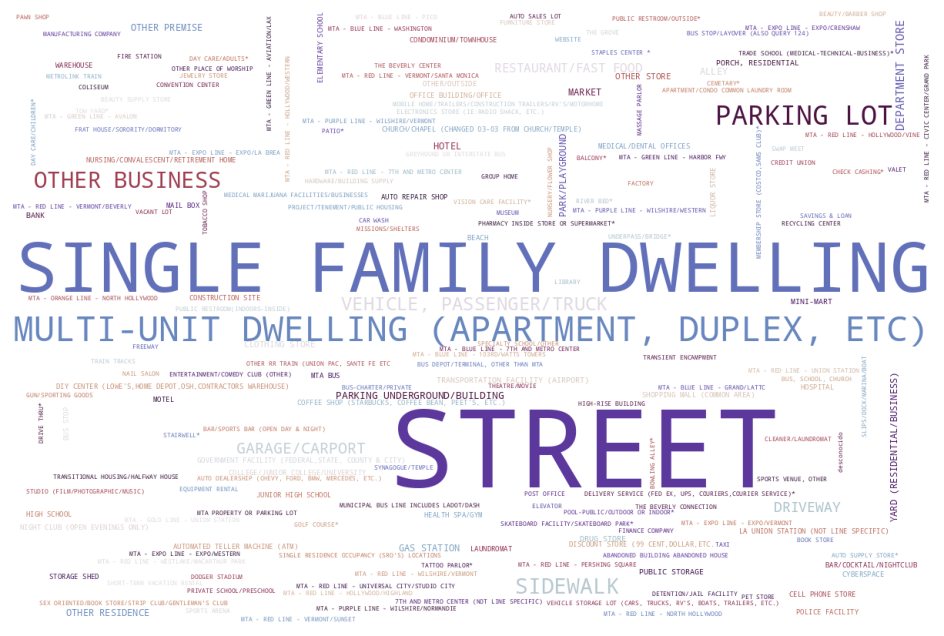

In [ ]:
nube = WordCloud(width=1200,
        height=800,
        random_state=15,
        background_color="white",
        colormap="twilight_shifted",
        collocations=False).generate_from_frequencies(premis_dict)

# MOSTRAR LA IMAGEN GENERADA:
plt.imshow(nube)
plt.axis("off")
plt.show()

*La* conclusion entonces es que el lugar mas comun en donde se producen los crimenes es la calle...**STREET**

Nos movemos a la siguiente pregunta: **Cual fue el año con mas crimes en LA?**

Para esto realizamos nuevamente un grafico con Seaborn y con el campo DATE OCC sacamos el numero de incidentes por año:

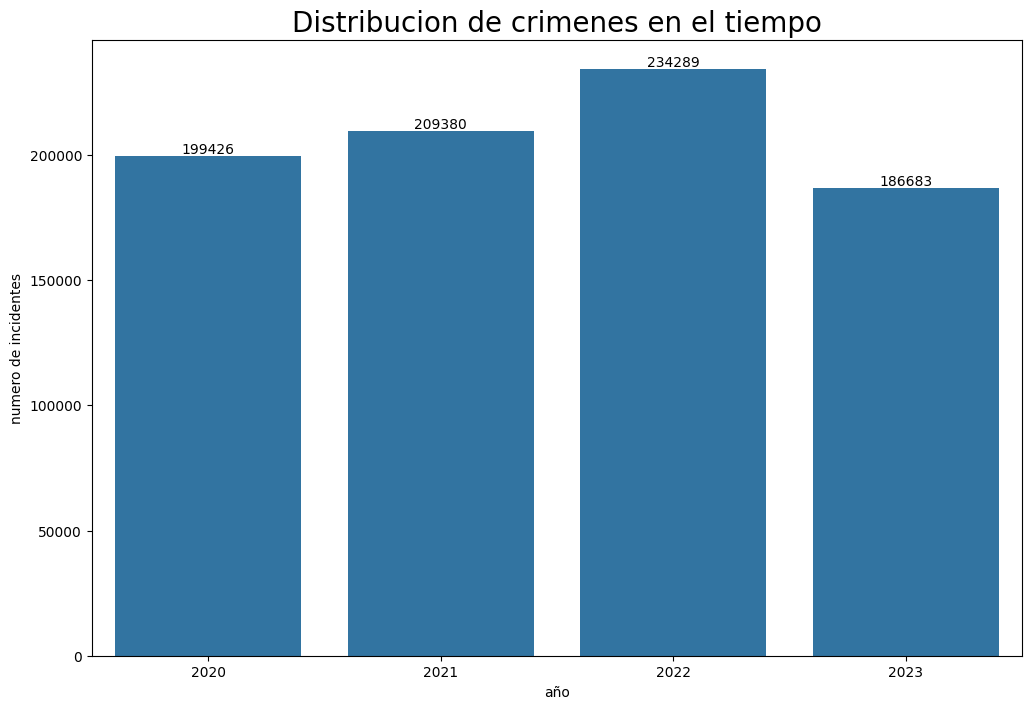

In [ ]:
ax=sns.countplot(x=df['DATE OCC'].dt.year)
for i in ax.containers:
  ax.bar_label(i)
  plt.title('Distribucion de crimenes en el tiempo')
  plt.xlabel('año')
  plt.ylabel('numero de incidentes')
  plt.show()

Naturalmente concluimos que el año **2022** fue el que mas crimenes tuvo, auntque no contamos con la informacion completa del año 2023, lo cual nos lleva a pensar mirando este grafico que hay un crecimiento año a año con lo cual es probable que el año 2023 termine con mas delitos que el 2022

Vamos ahora a explorar el universo de las victimas, para esto tenemos los campos VICT AGE (edad de la victima) y VICT SEX (genero de la victima) que nos permitan ver mas informacion a clasificar:

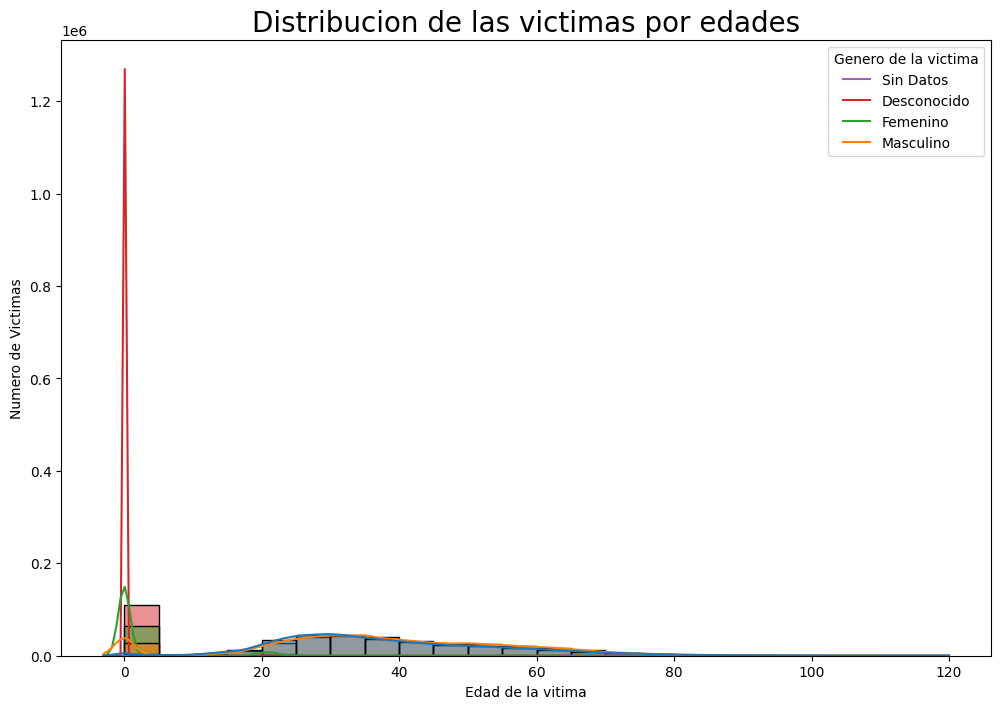

In [ ]:
plt.figure(figsize=(12,8))
sns.histplot(data = df, x = 'Vict Age', hue = 'Vict Sex', bins = np.arange(0,100,5), kde = True)
plt.title("Distribucion de las victimas por edades")
plt.xlabel("Edad de la vitima")
plt.ylabel('Numero de Victimas')
plt.legend(['Sin Datos', 'Desconocido', 'Femenino', 'Masculino'], title = "Genero de la victima");

Puede ser que la cantidad de personas que figuran como 0 en edad, sea un error de la base o que sea un numero por defecto que se pone cuando la persona no quiere decir su edad, con lo cual se excluyen los 0 para "limpiar la muestra" **esto forma parte del desafio de la clase 29**

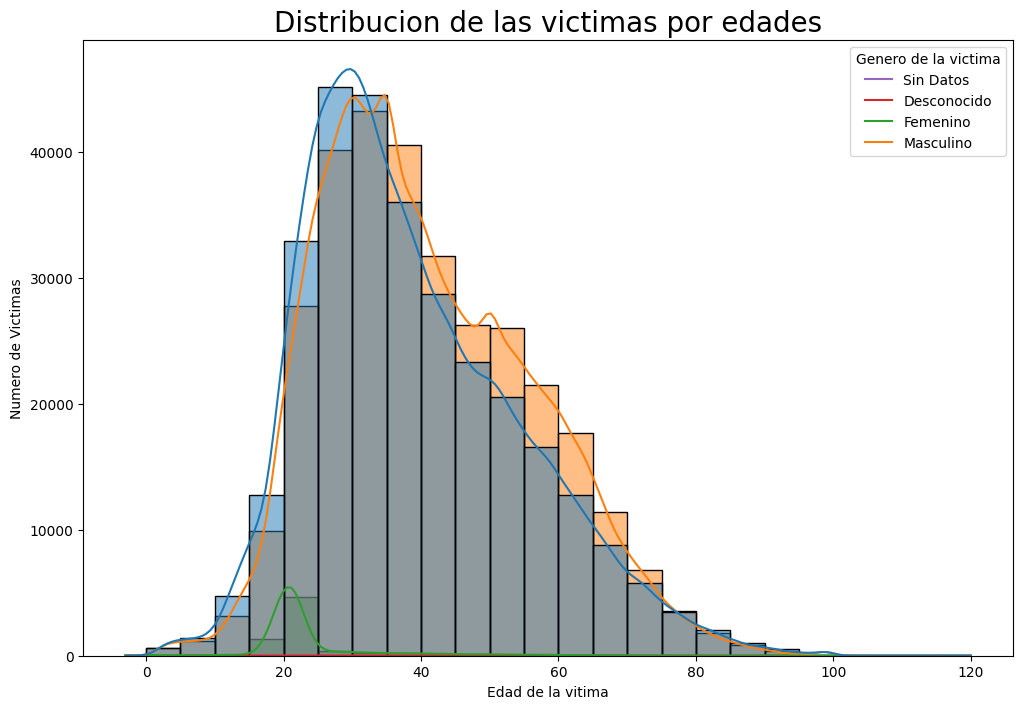

In [ ]:
plt.figure(figsize=(12,8))
sns.histplot(data = df[df['Vict Age'] != 0], x = 'Vict Age', hue = 'Vict Sex', bins = np.arange(0,100,5), kde = True)
plt.title("Distribucion de las victimas por edades")
plt.xlabel("Edad de la vitima")
plt.ylabel('Numero de Victimas')
plt.legend(['Sin Datos', 'Desconocido', 'Femenino', 'Masculino'], title = "Genero de la victima");

La mayoría de las víctimas tienen entre 20 y 40 años, pero es posible que esto no refleje con precisión la vulnerabilidad, ya que simplemente puede haber más personas de esta edad en la ciudad. Si asumimos una dinámica poblacional estable en esta ciudad (la diferencia entre grupos de edad no es muy grande), estos datos pueden apuntar a los **adultos** como las principales víctimas. Sin embargo, también debemos considerar que los delitos que involucran a niños y ancianos tienden a no denunciarse.

Viendo que las edades nos proporcionaron cierta informacion, seguimos investigando si tenemos algo mas sobre las victimas y nos encontramos con el campo **Vict Descent** que contiene lo siguiente:

In [ ]:
df['Vict Descent']

0         B
1         H
2         X
3         W
4         X
         ..
829773    H
829774    H
829775    B
829776    H
829777    H
Name: Vict Descent, Length: 829778, dtype: object

Decidimos transformar esta informacion para que sea mas incorporable en un grafico de torta:

In [ ]:
df['Ethnic'] = df['Vict Descent'].transform(lambda x:
                                "Hispano" if x=="H"
                                else "Caucasico" if x=="W"
                                else "Negro" if x == "B"
                                else "Desconocido" if x=="X"
                                else "Otros" if x=="O"
                                else "Islas del pacifico" if x in ["G", "I", "P", "S", "U"]
                                else "Asiaticos")

Veamos como nos quedo el campo **df['Ethnic']**

In [ ]:
df['Ethnic']

0               Negro
1             Hispano
2         Desconocido
3           Caucasico
4         Desconocido
             ...     
829773        Hispano
829774        Hispano
829775          Negro
829776        Hispano
829777        Hispano
Name: Ethnic, Length: 829778, dtype: object

**HAGAMOS EL GRAFICO!!**

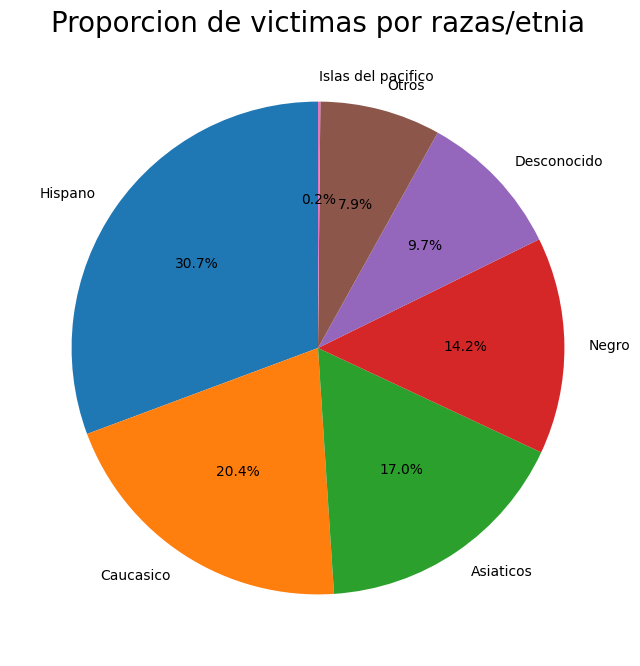

In [ ]:
df['Ethnic'].value_counts().plot(kind = "pie", autopct='%1.1f%%', startangle=90)
plt.title("Proporcion de victimas por razas/etnia")
plt.axis("off");

A partir del número de víctimas, podemos llegar a la conclusión de que los **hispanos** son los más atacados, seguidos por los caucásicos, luego los asiáticos y luego los negros. Sin embargo, para comprobar la vulnerabilidad, debemos considerar la distribución de razas en la ciudad.

Viendo que tenemos el AREA y tambien la ETNIA de las victimas, podemos explorar un poco mas y ver donde se producen la mayor cantidad de crimines por LOCACION Y ETNIA:

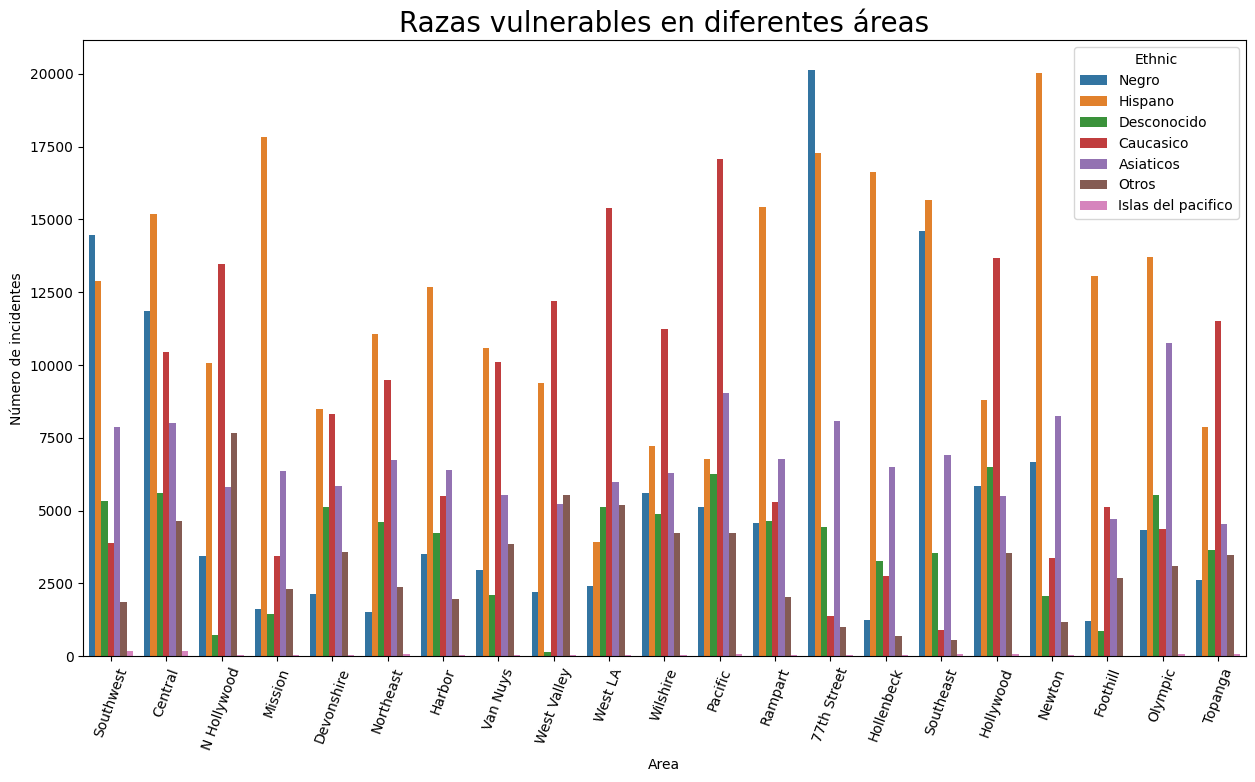

In [ ]:
plt.figure(figsize=(15,8))
sns.countplot(data = df, x = "AREA NAME", hue = "Ethnic")
plt.xticks(rotation=70)
plt.title("Razas vulnerables en diferentes áreas")
plt.ylabel("Número de incidentes")
plt.xlabel("Area");

partir de este grafico podemos observar como se concentran en las distintas ciudades el numero de victimas respecto a su raza. Tomando como ejemplo la raza negra, vemos que en **Southwest y 77th Street** podriamos tener un problema de racismo o preponderancia a ataques a ese grupo étnico

Para la fase de modelado predictivo de nuestro proyecto, identifiqué un conjunto de características clave de nuestro conjunto de datos que probablemente influyan en el resultado de los casos penales. Las características seleccionadas son:

AREA: representa el área geográfica donde ocurrió el delito, lo que podría ser crucial para comprender los patrones de delincuencia regionales.

CRM CODE: El código específico asignado al tipo de delito cometido. Los diferentes tipos de delitos pueden tener diferentes tasas de resolución.

VICT SEX: El género de la víctima, que puede correlacionarse con ciertos tipos de delitos o sus tasas de resolución.

Vict Descent: el origen de la víctima, lo que potencialmente proporciona información sobre si ciertos grupos demográficos tienen más probabilidades de que sus casos se resuelvan.

Weapon Desc: El código de cualquier arma utilizada en el delito, un factor importante para comprender la naturaleza y gravedad del delito.

hora: La hora del día en que ocurrió el delito. El tiempo puede ser un factor importante en la ocurrencia y resolución de un delito.

Además, reconozco la importancia del tiempo en relación con la denuncia y resolución de delitos. Para mejorar aún más nuestro modelo, calculamos medidas de tiempo:

demora: Este es el número de días entre el momento en que ocurrió el delito (fecha_ocurrió) y el momento en que se informó (fecha_reportada).

días_después_reportado: Representa el número de días desde la denuncia del delito hasta la fecha actual.

In [ ]:
# Importar las librerias

import pandas as pd
from datetime import datetime

import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Cambio de DF a DATA para comenzar a limpiar la base
data = pd.read_csv('Crime_Data_from_2020_to_Present.csv',sep=',')
data.head()

,DR_NO,Date Rptd,DATE OCC,TIME OCC,AREA,AREA NAME,Rpt Dist No,Part 1-2,Crm Cd,Crm Cd Desc,...,Status,Status Desc,Crm Cd 1,Crm Cd 2,Crm Cd 3,Crm Cd 4,LOCATION,Cross Street,LAT,LON
0,10304468,01/08/2020 12:00:00 AM,01/08/2020 12:00:00 AM,2230,3,Southwest,377,2,624,BATTERY - SIMPLE ASSAULT,...,AO,Adult Other,624.0,NaN,NaN,NaN,1100 W 39TH PL,NaN,34.0141,-118.2978
1,190101086,01/02/2020 12:00:00 AM,01/01/2020 12:00:00 AM,330,1,Central,163,2,624,BATTERY - SIMPLE ASSAULT,...,IC,Invest Cont,624.0,NaN,NaN,NaN,700 S HILL ST,NaN,34.0459,-118.2545
2,200110444,04/14/2020 12:00:00 AM,02/13/2020 12:00:00 AM,1200,1,Central,155,2,845,SEX OFFENDER REGISTRANT OUT OF COMPLIANCE,...,AA,Adult Arrest,845.0,NaN,NaN,NaN,200 E 6TH ST,NaN,34.0448,-118.2474
3,191501505,01/01/2020 12:00:00 AM,01/01/2020 12:00:00 AM,1730,15,N Hollywood,1543,2,745,VANDALISM - MISDEAMEANOR ($399 OR UNDER),...,IC,Invest Cont,745.0,998.0,NaN,NaN,5400 CORTEEN PL,NaN,34.1685,-118.4019
4,191921269,01/01/2020 12:00:00 AM,01/01/2020 12:00:00 AM,415,19,Mission,1998,2,740,"VANDALISM - FELONY ($400 & OVER, ALL CHURCH VA...",...,IC,Invest Cont,740.0,NaN,NaN,NaN,14400 TITUS ST,NaN,34.2198,-118.4468


In [ ]:
# Limpiando la base

# Valores nulos
missing_values = data.isnull().sum()

# duplicados
duplicate_rows = data.duplicated().sum()

#Analizando tipos de datos
data_types = data.dtypes

missing_values, duplicate_rows, data_types

(DR_NO                  0
 Date Rptd              0
 DATE OCC               0
 TIME OCC               0
 AREA                   0
 AREA NAME              0
 Rpt Dist No            0
 Part 1-2               0
 Crm Cd                 0
 Crm Cd Desc            0
 Mocodes           114856
 Vict Age               0
 Vict Sex          109299
 Vict Descent      109307
 Premis Cd             10
 Premis Desc          492
 Weapon Used Cd    540459
 Weapon Desc       540459
 Status                 0
 Status Desc            0
 Crm Cd 1              10
 Crm Cd 2          768750
 Crm Cd 3          827720
 Crm Cd 4          829717
 LOCATION               0
 Cross Street      697270
 LAT                    0
 LON                    0
 dtype: int64,
 0,
 DR_NO               int64
 Date Rptd          object
 DATE OCC           object
 TIME OCC            int64
 AREA                int64
 AREA NAME          object
 Rpt Dist No         int64
 Part 1-2            int64
 Crm Cd              int64
 Crm Cd De

In [ ]:
# reemplazando datos nulos
data.fillna("Unknown", inplace=True)

# convirtiendo a Datetime
data['Date Rptd'] = pd.to_datetime(data['Date Rptd'], format='%Y-%m-%d')
data['DATE OCC'] = pd.to_datetime(data['DATE OCC'], format='%Y-%m-%d')
data['hora'] = data['DATE OCC'].dt.hour

In [ ]:
# Calculando la demora en reportar los casos
today = datetime.now()
data['demora'] = (data['Date Rptd'] - data['DATE OCC']).dt.days
data['demora'] = data['demora'].apply(lambda x: x if x >= 0 else 0)
data['días_después_reportado'] = (today - data['Date Rptd']).dt.days

In [ ]:
# Agregando la columna caso resuelto
data['caso_resuelto'] = data['Status Desc'].apply(lambda x: 'No resuelto' if x == 'Invest Cont' else 'Resuelto')

# preparacion de datos para sexo de la victima plot
sex_solved_counts = data.groupby(['Vict Sex', 'caso_resuelto']).size().unstack()
sex_solved_percent = sex_solved_counts.div(sex_solved_counts.sum(axis=1), axis=0) * 100

# Dpreparacion de datos para crimer descripcion plot
crime_solved_counts = data.groupby(['Crm Cd Desc', 'caso_resuelto']).size().unstack()
crime_solved_percent = crime_solved_counts.div(crime_solved_counts.sum(axis=1), axis=0) * 100
crime_solved_percent_sorted = crime_solved_percent.sort_values(by='Resuelto', ascending=False)

# preparacion de datos para area plot
area_solved_counts = data.groupby(['AREA NAME', 'caso_resuelto']).size().unstack()
area_solved_percent = area_solved_counts.div(area_solved_counts.sum(axis=1), axis=0) * 100
area_solved_percent_sorted = area_solved_percent.sort_values(by='Resuelto', ascending=False)

fig = make_subplots(
    rows=2, cols=2,
    subplot_titles=('Porcentaje de casos por sexo de la víctima y estado de resolución',
                    'Porcentaje de casos por nombre de área y estado de resolución',
                    'Porcentaje de casos por descripción del delito y estado de resolución'),
    specs=[[{"type": "bar"}, {"type": "bar"}],
           [{"type": "bar", "colspan": 2}, None]],
    horizontal_spacing=0.15, vertical_spacing=0.2
)

# Plot para el campo sexo de la vitima
fig.add_trace(
    go.Bar(x=sex_solved_percent.index, y=sex_solved_percent['Resuelto'], name='Resuelto', marker_color='dodgerblue'),
    row=1, col=1
)
fig.add_trace(
    go.Bar(x=sex_solved_percent.index, y=sex_solved_percent['No resuelto'], name='No resuelto', marker_color='salmon'),
    row=1, col=1
)

# Plot para el area
fig.add_trace(
    go.Bar(x=area_solved_percent_sorted.index, y=area_solved_percent_sorted['Resuelto'], name='Resuelto', marker_color='dodgerblue', showlegend=False),
    row=1, col=2
)
fig.add_trace(
    go.Bar(x=area_solved_percent_sorted.index, y=area_solved_percent_sorted['No resuelto'], name='No resuelto', marker_color='salmon', showlegend=False),
    row=1, col=2
)

# Plot para la descripcion del crimen
fig.add_trace(
    go.Bar(x=crime_solved_percent_sorted.index, y=crime_solved_percent_sorted['Resuelto'], name='Resuelto', marker_color='dodgerblue', showlegend=False),
    row=2, col=1
)
fig.add_trace(
    go.Bar(x=crime_solved_percent_sorted.index, y=crime_solved_percent_sorted['No resuelto'], name='No resuelto', marker_color='salmon', showlegend=False),
    row=2, col=1
)


fig.update_layout(
    height=800,
    barmode='stack',
    title_text="Estado de resolución del caso por sexo de la víctima, nombre del área y descripción del delito",
    template='plotly_white'
)

# Titulos de los ejes
fig.update_yaxes(title_text="Porcentaje de casos (%)", row=1, col=1)
fig.update_yaxes(title_text="Porcentaje de casoss (%)", row=1, col=2)
fig.update_yaxes(title_text="Porcentaje de casos (%)", row=2, col=1)

fig.update_xaxes(showticklabels=False, row=2, col=1)

fig.show()

In [ ]:
# preparando dato objetivo (target) para que sea binario
target = 'caso_resuelto'
le = LabelEncoder()
data[target] = le.fit_transform(data[target])

# caracteristicas para el modelo
features = ['AREA', 'Crm Cd', 'Vict Sex', 'Vict Descent', 'Weapon Desc', 'hora', 'demora', 'días_después_reportado']

# convertimos las caracteristicas a String
for feature in ['Vict Sex', 'Vict Descent', 'Weapon Desc']:
    data[feature] = data[feature].astype(str)

# Codificaciones de las caracteristicas
label_encoders = {}
for feature in ['Vict Sex', 'Vict Descent', 'Weapon Desc']:
    le = LabelEncoder()
    data[feature] = le.fit_transform(data[feature])
    label_encoders[feature] = le

# mostramos las primeras columnas para verificar el encoding
data[features].head()

,AREA,Crm Cd,Vict Sex,Vict Descent,Weapon Desc,hora,demora,días_después_reportado
0,3,624,1,2,65,0,0,1558
1,1,624,3,7,75,0,1,1564
2,1,845,5,19,77,0,61,1461
3,15,745,1,18,77,0,0,1565
4,19,740,5,19,77,0,0,1565


In [ ]:
# preparamos los datos
X = data[features]  # caracteristicas
y = data[target]    # Target

In [ ]:
import statsmodels.api as sm
def forward_selection(data, target, significance_level=0.01):
    initial_features = data.columns.tolist()
    best_features = []
    while (len(initial_features)>0):
        remaining_features = list(set(initial_features)-set(best_features))
        new_pval = pd.Series(index=remaining_features)
        for new_column in remaining_features:
            model = sm.OLS(target, sm.add_constant(data[best_features+[new_column]])).fit()
            new_pval[new_column] = model.pvalues[new_column]
        min_p_value = new_pval.min()
        if(min_p_value<significance_level):
            best_features.append(new_pval.idxmin())
        else:
            break
    return best_features

Aqui ya estamos en el punto de que nos diga cuales son los campos a tomar con un **FOWARD SELECTION**:

In [ ]:
forward_selection(X,y)

['Weapon Desc',
 'Vict Descent',
 'Crm Cd',
 'Vict Sex',
 'días_después_reportado',
 'AREA',
 'demora']

In [ ]:
!pip install mlxtend

In [ ]:
import sys
import joblib
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
sys.modules['sklearn.externals.joblib'] = joblib

In [ ]:
#Librerias
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from sklearn.linear_model import LinearRegression
# Sequential Forward Selection(sfs)
sfs = SFS(LinearRegression(),
          k_features=7,
          forward=True,
          floating=False,
          scoring = 'r2',
          cv = 0)

In [ ]:
sfs.fit(X, y)
sfs.k_feature_names_     #Lista final de features

('AREA',
 'Crm Cd',
 'Vict Sex',
 'Vict Descent',
 'Weapon Desc',
 'demora',
 'días_después_reportado')

In [ ]:
# dividimos el dataset para entrenar
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# estandarizacion de los datos
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Estandarizar las características (importante para la regresión logística)
log_reg = LogisticRegression()
log_reg.fit(X_train_scaled, y_train)

# Modelo Random Forest Classifier
rf_clf = RandomForestClassifier()
rf_clf.fit(X_train, y_train)

# hacer las predicciones y evaluar los modelos
log_reg_pred = log_reg.predict(X_test_scaled)
rf_clf_pred = rf_clf.predict(X_test)

print("Precisión de la regresión logística:", accuracy_score(y_test, log_reg_pred))
print("Precisión Random Forest Classifier :", accuracy_score(y_test, rf_clf_pred))

# Detalle de la performance de cada modelo
print("\nReporte de regresion logistica :\n", classification_report(y_test, log_reg_pred))
print("\nReporte de Random Forest Classifier  :\n", classification_report(y_test, rf_clf_pred))

Precisión de la regresión logística: 0.793551704467851
Precisión Random Forest Classifier : 0.8137458121429777

Reporte de regresion logistica :
               precision    recall  f1-score   support

           0       0.81      0.98      0.88    199020
           1       0.40      0.06      0.10     49914

    accuracy                           0.79    248934
   macro avg       0.60      0.52      0.49    248934
weighted avg       0.72      0.79      0.73    248934


Reporte de Random Forest Classifier  :
               precision    recall  f1-score   support

           0       0.87      0.91      0.89    199020
           1       0.54      0.44      0.49     49914

    accuracy                           0.81    248934
   macro avg       0.70      0.67      0.69    248934
weighted avg       0.80      0.81      0.81    248934



# **Conclusión**
En este proyecto, empleé dos modelos predictivos diferentes (regresión logística y clasificador de bosque aleatorio) para analizar y predecir los resultados de los casos. La elección de estos modelos fue estratégica, considerando su idoneidad y desempeño en tareas de clasificación, especialmente en escenarios como el nuestro con una combinación de datos categóricos y numéricos.

**Comparación de rendimiento del modelo:**

**Regresión logística**: logró una precisión de aproximadamente el 79.6 %. Si bien ofrece una precisión general decente, su rendimiento en la identificación de casos "resueltos" (clase 1) fue notablemente inferior, como lo indica el bajo recuerdo y la puntuación F1 para esta clase. Esto sugiere que, si bien la regresión logística es bastante buena para predecir casos "no resueltos", tiene dificultades con los casos "resueltos".

**Clasificador de bosque aleatorio**: demostró una precisión superior de alrededor del 81.3 %. Más importante aún, mostró un rendimiento más equilibrado en ambas clases, con una precisión y recuperación significativamente mejores para casos "resueltos" en comparación con la regresión logística. Esto indica una mayor capacidad para diferenciar entre casos "resueltos" y "no resueltos".

En resumen, si bien la regresión logística proporcionó una comprensión básica, el clasificador de bosque aleatorio surgió como el modelo más sólido para nuestro conjunto de datos. Su capacidad para manejar el desequilibrio de clases y capturar relaciones complejas entre características lo hace particularmente adecuado para predecir los resultados de casos penales. Este análisis comparativo subraya la importancia de seleccionar el modelo correcto en función de la naturaleza de los datos y los requisitos específicos de la tarea en cuestión.

<Figure size 1000x600 with 0 Axes>

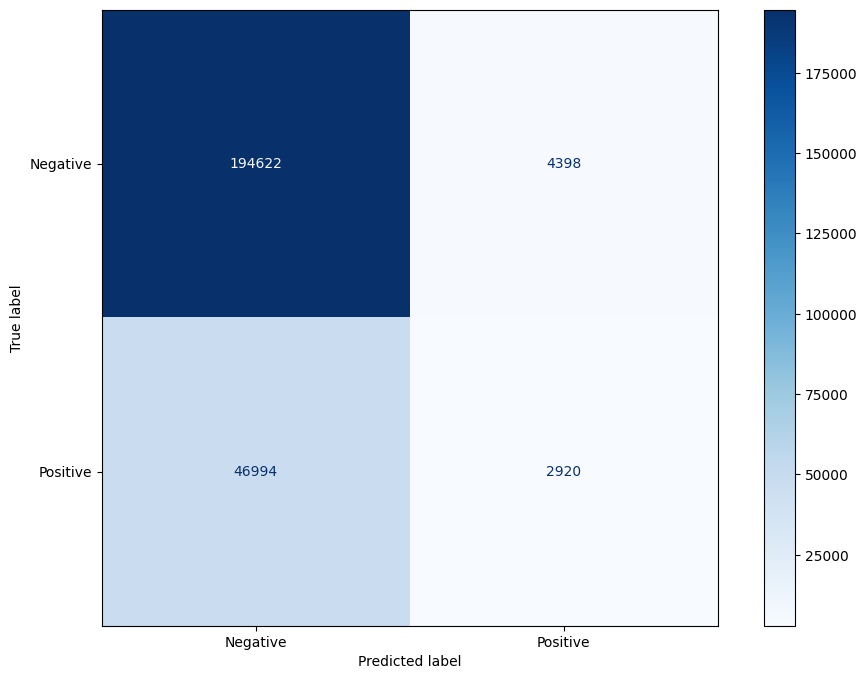

In [ ]:
plt.figure(figsize=(10,6))
cm = confusion_matrix(y_test, log_reg_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=['Negative', 'Positive'])
disp = disp.plot(cmap="Blues")
plt.show()
#ConfusionMatrixDisplay(modelo, X_test, y_test, display_labels=['Negative', 'Positive'])

# Agregado para Practica integradora

En el caso de la regresión logística:

La precisión en los datos de entrenamiento es del 79.31% y en los datos de prueba es del 79.00%. La diferencia entre estos dos valores no es muy grande, lo que sugiere que el modelo no está sobreajustado.
Sin embargo, la precisión general es relativamente baja, lo que podría sugerir que el modelo está subajustado y necesita ser más complejo o requiere mejores características para capturar los patrones en los datos.
Para el Random Forest Classifier:

La precisión en los datos de entrenamiento es del 81.36% y en los datos de prueba es del 81.00%. Al igual que en el caso anterior, la diferencia no es significativa, lo que sugiere que el modelo no está sobreajustado.
La precisión general es más alta que la de la regresión logística, lo que indica que este modelo está mejorando la generalización y es menos probable que esté subajustado.
En resumen, los resultados sugieren que ambos modelos tienen un rendimiento similar en los datos de entrenamiento y prueba, lo que indica que no están sobreajustados. Sin embargo, la precisión general podría ser mejor, lo que sugiere que hay margen para mejorar la generalización del modelo. Es posible que desees considerar la exploración de más características, la optimización de hiperparámetros o la experimentación con diferentes algoritmos para mejorar el rendimiento general del modelo

## Conclusiones finales

#### Insights Crimenes en LA
* El lugar mas peligroso donde se producen los crimenes es la calle
* Los principales afectados son los Hispanos
* West Valley tiene el % mas alto de resolucion de crimenes
* Los adultos son un blanco mas facil y esto se refleja como insight al encontrar que se encuentran dentro de los grupos con mayor cantidad de crimenes
* El robo de autos es el crimen mas comun en LA



**Pros**
* Encontramos los crimenes mas comunes y sus locaciones
* Tenemos certeza de los casos que se resuelven y podemos predecir si se pueden resolver o no
* Sabemos las edades y etnias mas vulnerables a estos crimenes

**Cons**
* A nivel poblacional se necesitan mas datos para poder tener una mayor certeza de los pasos a tomar, sin embargo reforzando la seguridad en las calles podremos observar una mejora sustancial no solo en la frecuencia, sino tambien en la cantidad de crimenes